# <center>Домашнее задание №4</center>

## 1. Для произвольного набора данных с известными классами найти наилучший алгоритм кластеризации, согласующийся с ground truth (максимизировать supervised-метрики путем выбора алгоритма кластеризации и подбора его гиперпараметров).
## 2. Построить 2D- или 3D-визуализацию данных при помощи t-SNE.

In [121]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering, MeanShift

from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

### Загружаем датасет

In [122]:
seeds = pd.read_csv('seeds_dataset.csv', index_col='ID')
seeds.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
ID,,,,,,,,
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Посмотрим распределение классов (целевая переменная) в наборе данных

In [123]:
seeds.groupby('seedType').count()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
seedType,,,,,,,
1,70,70,70,70,70,70,70
2,70,70,70,70,70,70,70
3,70,70,70,70,70,70,70


<AxesSubplot:xlabel='seedType', ylabel='count'>

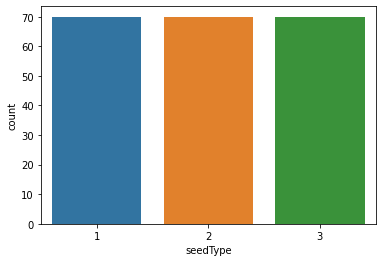

In [124]:
sns.countplot(x=seeds['seedType'])

### Делим на признаки X и целевую переменную y. Стандантизируем данные

In [125]:
X = seeds.drop(['seedType'], axis=1)
y = seeds['seedType']
X

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
ID,,,,,,,
1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
206,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
207,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
208,13.20,13.66,0.8883,5.236,3.232,8.315,5.056


In [126]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

# 1.1 K-Means

In [127]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [128]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

### Сделаем метки на 1 больше, для удобного отображения на графике 

In [129]:
kmeans_pred = np.copy(kmeans.labels_)+1
kmeans_pred

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2])

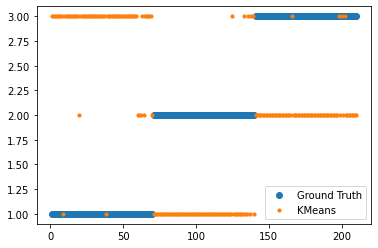

In [130]:
t = [i for i in X.index]
plt.scatter(t, y, label='Ground Truth')
plt.scatter(t, kmeans_pred, s=10, label='KMeans')
plt.legend()

### Как видно, многие метки совпали с точностью до перестановки, что говорит о хорошем качестве

### Для дальнейшего упрощения создадим функции вычисления supervised-метрик и отрисовки графика, подобного верхнему

In [133]:
scores_dict = {
    'Метрики качетсва кластеризации': ['Homogeneity score', 'Completeness score', \
                                       'V-measure score', 'Rand index adjusted for chance'],
}
def update_supervised_scores(dict_, col_label, y, preds):
    homo_score = metrics.homogeneity_score(y, preds)
    complete_score = metrics.completeness_score(y, preds)
    v_score = metrics.v_measure_score(y, preds)
    adj_rand_score = metrics.adjusted_rand_score(y, preds)
    
    scores_dict[col_label] = [homo_score, complete_score, \
                              v_score, adj_rand_score]

def plot_labels(X, y, preds, label):
    t = [i for i in X.index]
    plt.scatter(t, y, label='Ground Truth')
    plt.scatter(t, preds, s=10, label=label)
    plt.legend()
    
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

,Метрики качетсва кластеризации
0,Homogeneity score
1,Completeness score
2,V-measure score
3,Rand index adjusted for chance


In [134]:
update_supervised_scores(scores_dict, 'K-Means', y, kmeans_pred)
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

,Метрики качетсва кластеризации,K-Means
0,Homogeneity score,0.727705
1,Completeness score,0.728023
2,V-measure score,0.727864
3,Rand index adjusted for chance,0.773294


### Значения метрик подтверждают выводы о хорошем качестве, сделанные на основе визуального анализа распределения 

# 1.2 Agglomerative Clustering

In [135]:
aglom = AgglomerativeClustering(n_clusters=3)
aglom.fit(X_scaled)
aglom_pred = np.copy(aglom.labels_) + 1
aglom_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

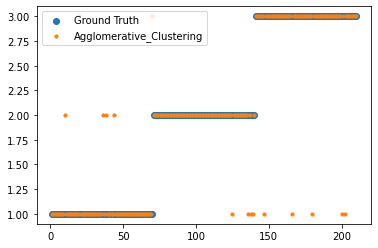

In [136]:
plot_labels(X, y, aglom_pred, 'Agglomerative_Clustering')

### По графику опять видно, что результат очень хороший

In [137]:
update_supervised_scores(scores_dict, 'Agglomerative_Clustering', y, aglom_pred)
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering
0,Homogeneity score,0.727705,0.749607
1,Completeness score,0.728023,0.750025
2,V-measure score,0.727864,0.749816
3,Rand index adjusted for chance,0.773294,0.796998


### Очевидно, что агломеративная кластеризация дает результат чуть лучше

# 1.3 Spectral Clustering

In [138]:
spectr = SpectralClustering(n_clusters=3, random_state=42).fit(X_scaled)
spectr_pred = np.copy(spectr.labels_) + 1

,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering
0,Homogeneity score,0.727705,0.749607,0.716714
1,Completeness score,0.728023,0.750025,0.717252
2,V-measure score,0.727864,0.749816,0.716983
3,Rand index adjusted for chance,0.773294,0.796998,0.760666


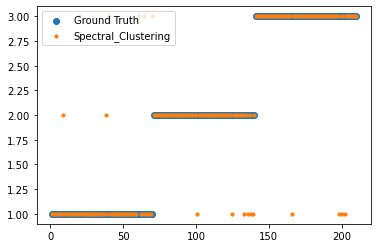

In [139]:
plot_labels(X, y, spectr_pred, 'Spectral_Clustering')

update_supervised_scores(scores_dict, 'Spectral_Clustering', y, spectr_pred)
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

### Пока из всех рассмотренных алгоритмов Спектральная кластеризация дает худшие результаты, но тем не менее все еще приемлемые 

# 1.4 Affinity Propagation

In [140]:
affin = AffinityPropagation(random_state=42).fit(X_scaled)
affin_pred = np.copy(affin.labels_) + 1

,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering,Affinity_Propagation
0,Homogeneity score,0.727705,0.749607,0.716714,0.797317
1,Completeness score,0.728023,0.750025,0.717252,0.361050
2,V-measure score,0.727864,0.749816,0.716983,0.497029
3,Rand index adjusted for chance,0.773294,0.796998,0.760666,0.259933


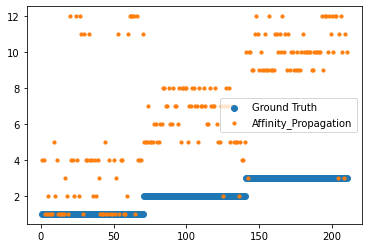

In [141]:
plot_labels(X, y, affin_pred, 'Affinity_Propagation')

update_supervised_scores(scores_dict, 'Affinity_Propagation', y, affin_pred)
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

### Алгоритм аффинного преобразования показывает совершенно непреемлемые результаты, как аналитически, так и визуально. Это происходит из-за того, что алгоритм должен сам "найти" оптимальное количество кластеров на основе предоставленных экземпляров, но при стандартных параметрах у него это не получается. 

### Здесь же можно сразу заметить, что несмотря на неадекватную кластеризацию, homogeneity score имеет большое значение.
### Вообще говоря, homogeneity score отражает то, насколько каждый кластер содержит членов одного класса - это согласуется с рисунком, так как кластеров выделено 12, а классов всего 3, поэтому логично, что данная метрика будет высока
### Completeness score - величина в некотором смысле обратная, отражает то, насколько все члены одного класса принадлежат одному выделенному кластеру. В данном случае это величина, очевидно, будет мала.
### V Score - гармоническое среднее предыдущих двух метрик
### Rand Index adjusted for chance - вычисляет меру сходства между двумя кластеризациями путем рассмотрения всех пар выборок и подсчета пар, которые назначены в одних и тех же или разных кластерах в прогнозируемых и истинных кластеризациях. Таким образом, значение 0 говорит о рандомном присваивании меток (кластеров), а 1 - идеальная, совпадающая с истинной кластеризация.

# 1.5 Mean Shift

In [142]:
meanshift = MeanShift().fit(X_scaled)
meanshift_pred = np.copy(meanshift.labels_) + 1

,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering,Affinity_Propagation,Mean_Shift
0,Homogeneity score,0.727705,0.749607,0.716714,0.797317,0.429044
1,Completeness score,0.728023,0.750025,0.717252,0.361050,0.684504
2,V-measure score,0.727864,0.749816,0.716983,0.497029,0.527471
3,Rand index adjusted for chance,0.773294,0.796998,0.760666,0.259933,0.451706


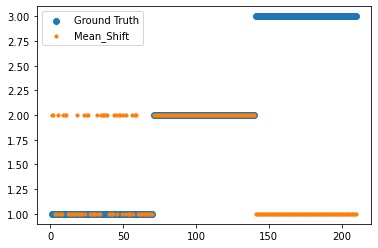

In [143]:
plot_labels(X, y, meanshift_pred, 'Mean_Shift')

update_supervised_scores(scores_dict, 'Mean_Shift', y, meanshift_pred)
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

### Реузльтаты весьма средние, лучше, чем у аффинного преобразования, но хуже фаворитов. Интересно, что выделено всего 2 кластера.

# 1.6 Настройка гиперпараметров.
### Попробуем оптимизировать гиперпараметры. Проведем оптимизацию на агломеративной и спектральной кластеризациях.
### Учитывая, что V score - гармоническое среднее homogeneity и completeness, то будем рассматривать только значения V score и Rand Index

### Сначала попробуем поработать с агломеративной кластеризацией

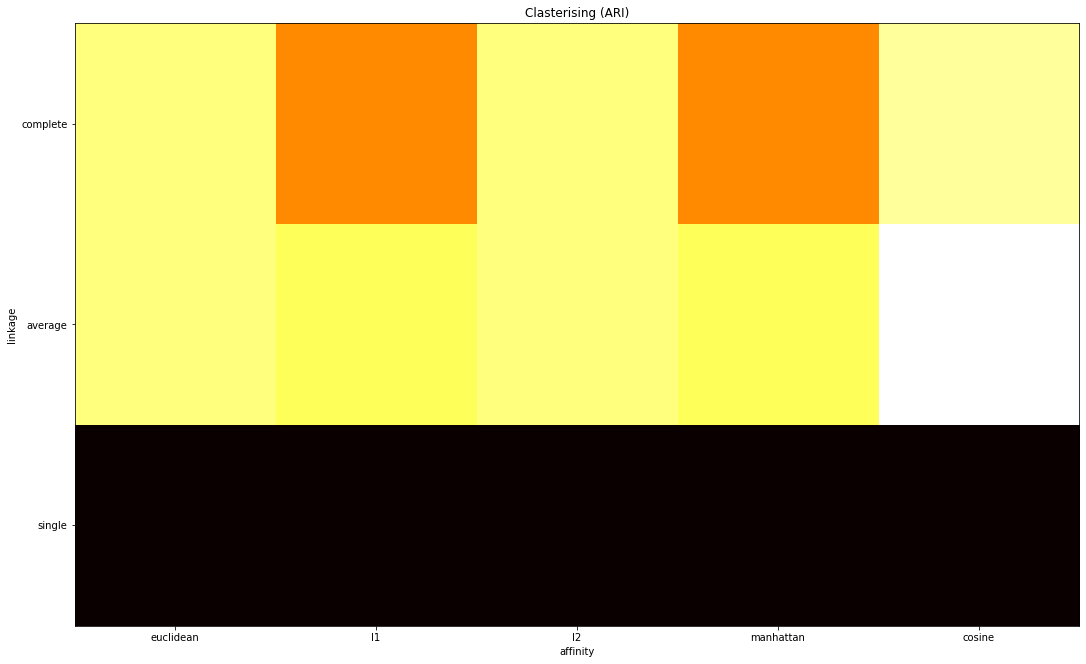

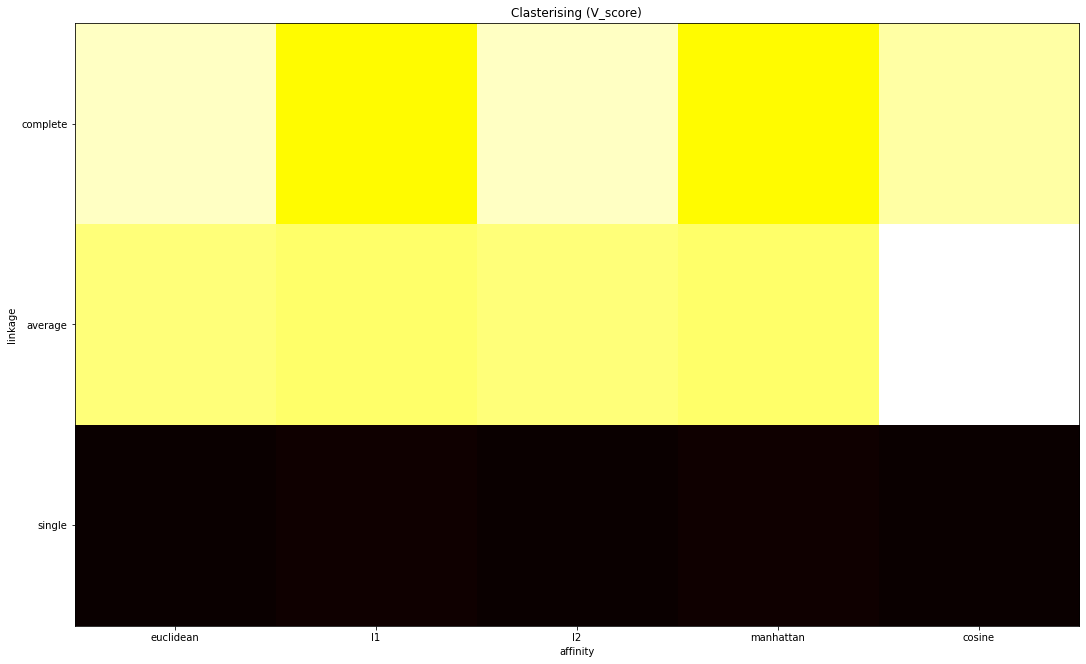

9 0.7889212187703276
9 0.7458491324787226


,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering,Affinity_Propagation,Mean_Shift,AgglomerativeClustering_v2
0,Homogeneity score,0.727705,0.749607,0.716714,0.797317,0.429044,0.745128
1,Completeness score,0.728023,0.750025,0.717252,0.361050,0.684504,0.746572
2,V-measure score,0.727864,0.749816,0.716983,0.497029,0.527471,0.745849
3,Rand index adjusted for chance,0.773294,0.796998,0.760666,0.259933,0.451706,0.788921


In [144]:
linkage = ['complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

results1 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results2 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results3 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))
results4 = np.zeros(len(linkage)*len(affinity)).reshape(len(linkage), len(affinity))

for i, link in enumerate(linkage):
    for j, aff in enumerate(affinity):
        agl_grid = AgglomerativeClustering(n_clusters=3, linkage=link, affinity=aff).fit(X_scaled)
        agl_pred = np.copy(agl_grid.labels_) + 1
        
        res1 = metrics.adjusted_rand_score(y, agl_pred)
        res2 = metrics.v_measure_score(y, agl_pred)
        res3 = metrics.homogeneity_score(y, agl_pred)
        res4 = metrics.completeness_score(y, agl_pred)
        results1[i, j] = res1
        results2[i, j] = res2
        results3[i, j] = res3
        results4[i, j] = res4
        

plt.figure(figsize=(18,12))
plt.imshow(results1, cmap=plt.cm.hot)
plt.title('Clasterising (ARI)')
plt.xlabel('affinity')
plt.ylabel('linkage')
plt.xticks(np.arange(5), affinity)
plt.yticks(np.arange(3), linkage)

plt.figure(figsize=(18,12))
plt.imshow(results2, cmap=plt.cm.hot)
plt.title('Clasterising (V_score)')
plt.xlabel('affinity')
plt.ylabel('linkage')
plt.xticks(np.arange(5), affinity)
plt.yticks(np.arange(3), linkage)

plt.show()

final_res1_ind = np.argmax(results1)
final_res2_ind = np.argmax(results2)
final_res3_ind = np.argmax(results3)
final_res4_ind = np.argmax(results4)
print(final_res1_ind, results1.flat[final_res1_ind])
print(final_res2_ind, results2.flat[final_res2_ind])

#update_supervised_scores(scores_dict, 'AgglomerativeClustering_v2', y, meanshift_pred)
scores_dict['AgglomerativeClustering_v2'] = [results3.flat[final_res3_ind], results4.flat[final_res4_ind], \
                                            results2.flat[final_res2_ind], results1.flat[final_res1_ind]]
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

### Как видно, улучшить результат не получилось

## Теперь поработаем со спектральной кластеризацией

In [145]:
linkage = ['complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']

gamma = np.arange(0., 1.1)
affinity = ['nearest_neighbors', 'rbf', 'poly', 'laplacian']
assign_labels = ['kmeans', 'discretize']
degree = [1., 2.]

k = len(gamma)
l = len(affinity)
m = len(assign_labels)
n = len(degree)

results1 = np.zeros(k*l*m*n).reshape(k,l,m,n)
results2 = np.zeros(k*l*m*n).reshape(k,l,m,n)
results3 = np.zeros(k*l*m*n).reshape(k,l,m,n)
results4 = np.zeros(k*l*m*n).reshape(k,l,m,n)

cnt = 0

for i, g in enumerate(gamma):
    for j, aff in enumerate(affinity):
        for p, asl in enumerate(assign_labels):
            for s, deg in enumerate(degree):
                #print(cnt, g, aff, asl, deg)
                sp_grid = SpectralClustering(n_clusters=3, gamma=g, affinity=aff, \
                                            assign_labels=asl, degree=deg, random_state=42).fit(X_scaled)
                sp_pred = np.copy(sp_grid.labels_) + 1
        
                res1 = metrics.adjusted_rand_score(y, sp_pred)
                res2 = metrics.v_measure_score(y, sp_pred)
                res3 = metrics.homogeneity_score(y, sp_pred)
                res4 = metrics.completeness_score(y, sp_pred)
                results1[i, j, p, s] = res1
                results2[i, j, p, s] = res2
                results3[i, j, p, s] = res3
                results4[i, j, p, s] = res4
                
                cnt += 1


final_res1_ind = np.argmax(results1)
final_res2_ind = np.argmax(results2)
final_res3_ind = np.argmax(results3)
final_res4_ind = np.argmax(results4)
print(final_res1_ind, results1.flat[final_res1_ind])
print(final_res2_ind, results2.flat[final_res2_ind])

#update_supervised_scores(scores_dict, 'AgglomerativeClustering_v2', y, meanshift_pred)
scores_dict['SpectralClustering_v2'] = [results3.flat[final_res3_ind], results4.flat[final_res4_ind], \
                                            results2.flat[final_res2_ind], results1.flat[final_res1_ind]]
scores = pd.DataFrame(scores_dict)
scores.style.background_gradient(cmap='YlOrRd')

22 0.7861464726421028
22 0.7396019989561122


,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering,Affinity_Propagation,Mean_Shift,AgglomerativeClustering_v2,SpectralClustering_v2
0,Homogeneity score,0.727705,0.749607,0.716714,0.797317,0.429044,0.745128,0.739510
1,Completeness score,0.728023,0.750025,0.717252,0.361050,0.684504,0.746572,0.739694
2,V-measure score,0.727864,0.749816,0.716983,0.497029,0.527471,0.745849,0.739602
3,Rand index adjusted for chance,0.773294,0.796998,0.760666,0.259933,0.451706,0.788921,0.786146


### Удалось улучшить результат спектральной кластеризации, но победителем все равно осталась агломеративная кластеризация!

# 2. T-SNE

### Как видно, кластеры хоть и есть, но они не сильно различимы, тем не менее, для наглядности изобразим ground truth разными цветами и увидим, что в целом они разделимы.

(-12.0, 12.0)

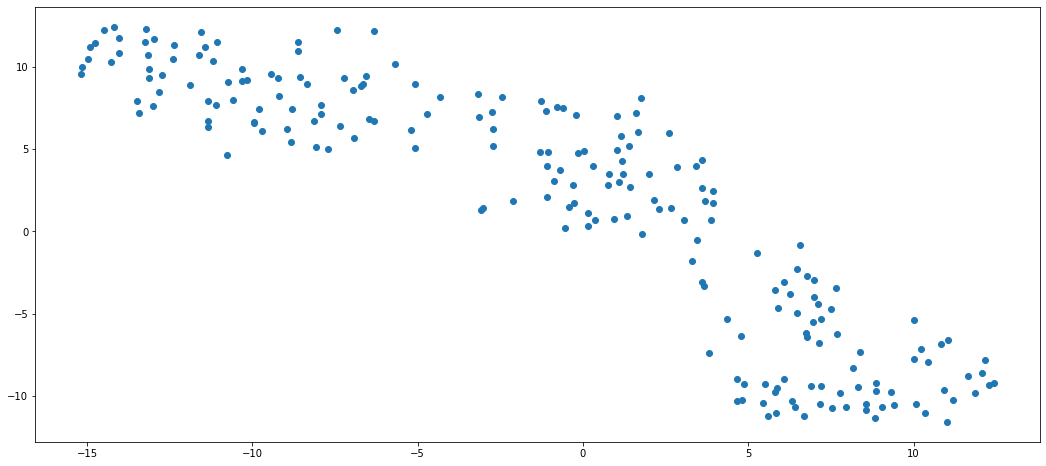

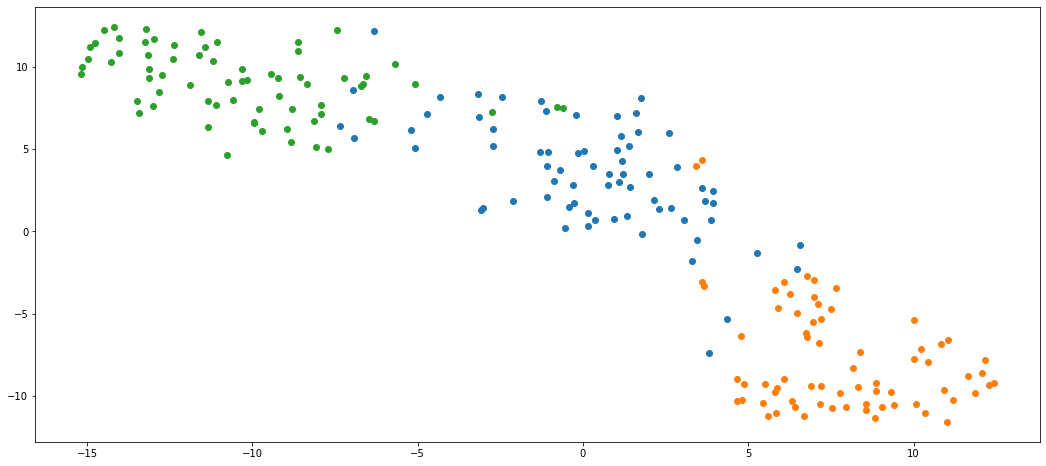

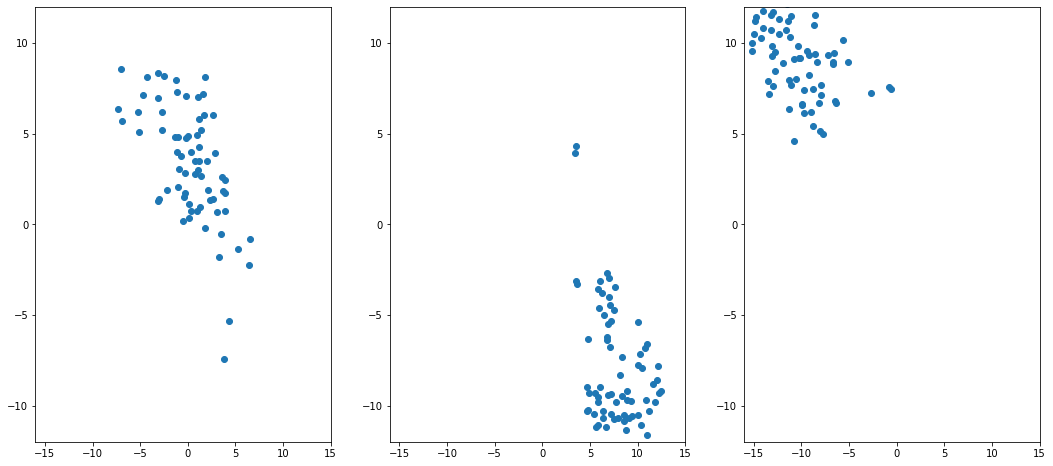

In [146]:
X_embedded = TSNE(n_components=2, init='random', metric='euclidean', random_state=42).fit_transform(X_scaled)
fig = plt.figure(figsize=(18,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1])

fig = plt.figure(figsize=(18,8))
plt.scatter(X_embedded[:70,0], X_embedded[:70,1])
plt.scatter(X_embedded[71:140,0], X_embedded[71:140,1])
plt.scatter(X_embedded[141:210,0], X_embedded[141:210,1])

fig1, axs = plt.subplots(1, 3, figsize=(18,8))
axs[0].scatter(X_embedded[:70,0], X_embedded[:70,1])
axs[1].scatter(X_embedded[71:140,0], X_embedded[71:140,1])
axs[2].scatter(X_embedded[141:210,0], X_embedded[141:210,1])
axs[0].set_xlim([-16, 15])
axs[1].set_xlim([-16, 15])
axs[2].set_xlim([-16, 15])
axs[0].set_ylim([-12, 12])
axs[1].set_ylim([-12, 12])
axs[2].set_ylim([-12, 12])

(210, 3)


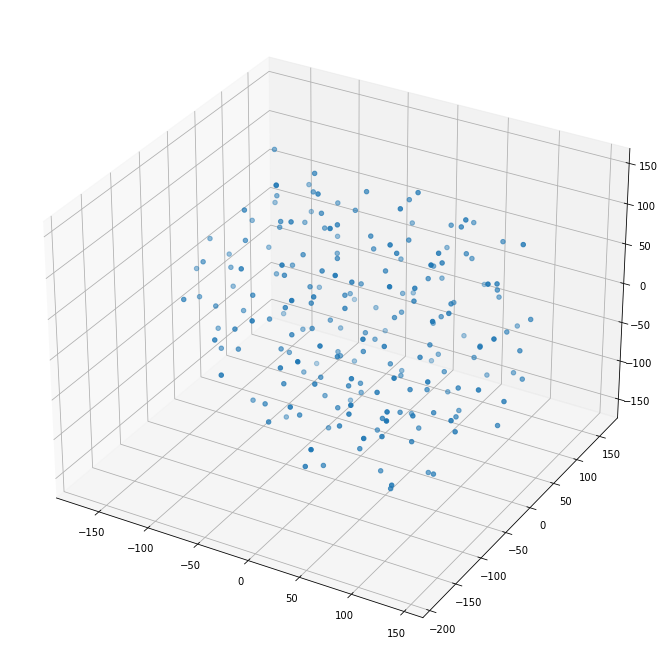

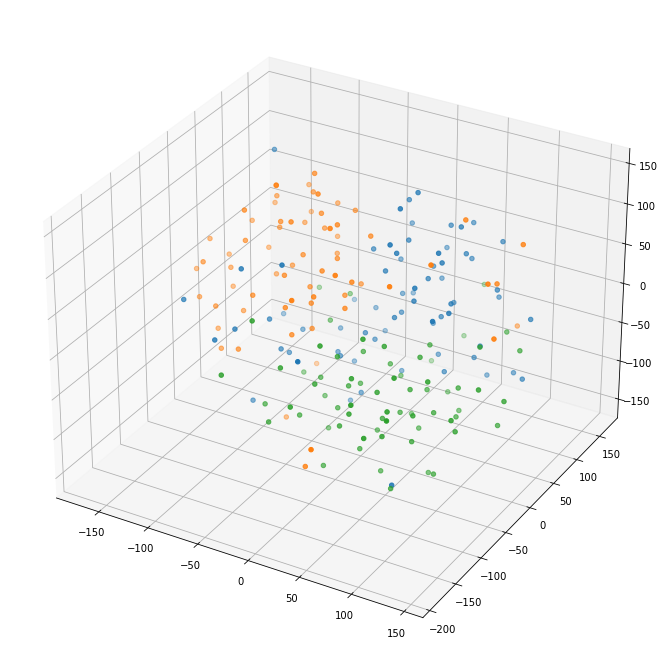

In [155]:
X_embedded3d = TSNE(n_components=3, init='random').fit_transform(X_scaled)
fig = plt.figure(figsize=(24,12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_embedded3d[:,0], X_embedded3d[:,1], X_embedded3d[:,2])
print(X_embedded3d.shape)
fig1 = plt.figure(figsize=(24,12))
ax1 = fig1.add_subplot(projection='3d')
ax1.scatter(X_embedded3d[:70,0], X_embedded3d[:70,1], X_embedded3d[:70,2])
ax1.scatter(X_embedded3d[71:140,0], X_embedded3d[71:140,1], X_embedded3d[71:140,2])
ax1.scatter(X_embedded3d[141:210,0], X_embedded3d[141:210,1], X_embedded3d[141:210,2])

### На 3D графике различить истинные классы уже сложнее

# ВЫВОД

### Таким образом, лучшим алгоритмом является алгоритм Agglomirative Clustering со стандартными гиперпараметрами. Таблица весьма хорошо отражает достигнутые результаты.

In [158]:
scores.style.background_gradient(cmap='YlOrRd')

,Метрики качетсва кластеризации,K-Means,Agglomerative_Clustering,Spectral_Clustering,Affinity_Propagation,Mean_Shift,AgglomerativeClustering_v2,SpectralClustering_v2
0,Homogeneity score,0.727705,0.749607,0.716714,0.797317,0.429044,0.745128,0.739510
1,Completeness score,0.728023,0.750025,0.717252,0.361050,0.684504,0.746572,0.739694
2,V-measure score,0.727864,0.749816,0.716983,0.497029,0.527471,0.745849,0.739602
3,Rand index adjusted for chance,0.773294,0.796998,0.760666,0.259933,0.451706,0.788921,0.786146


### При оптимизации параметров не получилось добиться лучшего качества, чем было, но зато получилось улучшить показатели Spectral Clustering